# DATA WRANGLING PROJECT 

# Student Name & ID:
 1. Siddharth Raj Saravanan - 12198198
 2. Subash Chander Swaminathan - 69873432
 3. Santhosh Balaaji Sowrirajalu Ramamurthy - 83451338
 4. Joel Mathew - 59414071
 
## International Visitors
This notebook consists of the wrangling involved in `International Visitors Data`

## Section 1 - Wrangling the International Visitors data

The steps are as follows:
 1. Treating the missing values
 2. Aggregating the columns
 3. Reshaping the dataframe into common structure

In [460]:
#Loading the required libraries:
library(tidyverse)
library(sqldf)
library(stringr)
library(data.table)
library(ggplot2)
library(gganimate)
library(gapminder)

### Treating the `Missing Values`:

In [461]:
#Reading CSV file into dataframe

df <- read_csv("vw_IVSSurveyMainHeader.csv")

#Selecting the required columns and Filtering the records from the dataframe into new dataframe to proceed further

df <- df %>% 
        select(Year,ArrivalMonth,CORNextYr,Airport,POV,AgeRange,MainAccommTypeUsed,LengthOfStay,TotalSpendInNZ,Gender,Qtr) %>% 
        filter(Year >= 2014)

unclean_df <- df
unclean_df %>% glimpse

Parsed with column specification:
cols(
  .default = col_character(),
  SurveyResponseID = col_double(),
  ResponseID = col_double(),
  NumberOfVisitsToNZ = col_double(),
  ArrivalDay = col_double(),
  ArrivalYear = col_double(),
  NoDaysInNZ = col_double(),
  FlightClass = col_logical(),
  VisitedAUSonvisit = col_logical(),
  NoDaysInAustralia = col_logical(),
  NoDaysInAustraliaNotKnown = col_logical(),
  GroupTour = col_logical(),
  PackageDeal = col_logical(),
  PkgIncludedAirfare = col_logical(),
  NoNightsOtherCountry = col_double(),
  TravelParty = col_logical(),
  NoPeopleOver15 = col_double(),
  NoPeopleunder15 = col_double(),
  TotalCost = col_double(),
  NoPeopleSpendFor = col_double(),
  LengthOfStay = col_double()
  # ... with 11 more columns
)

See spec(...) for full column specifications.

Warning message:
"47344 parsing failures.
   row               col           expected                        actual                         file
120186 VisitedAUSonvisit 1/0/T/F/TRUE/F

Observations: 51,140
Variables: 11
$ Year               <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, ...
$ ArrivalMonth       <chr> "March", "March", "March", "April", "January", "...
$ CORNextYr          <chr> "United States of America", "United States of Am...
$ Airport            <chr> "Auckland", "Auckland", "Auckland", "Auckland", ...
$ POV                <chr> "Holiday / vacation", "Holiday / vacation", "Hol...
$ AgeRange           <chr> "65 - 69", "55 - 59", "60 - 64", "25 - 29", "30 ...
$ MainAccommTypeUsed <chr> "Bed and Breakfast", "Luxury Accommodation, 5-st...
$ LengthOfStay       <dbl> 17, 23, 14, 6, 75, 8, 14, 33, 7, 27, 5, 6, 5, 36...
$ TotalSpendInNZ     <dbl> 7.092227e+02, 1.418445e+04, 9.078051e+03, 1.8991...
$ Gender             <chr> "Female", "Male", "Male", "Male", "Female", "Mal...
$ Qtr                <chr> "2017 2", "2017 2", "2017 2", "2017 2", "2017 2"...


In [462]:
#Replaced the 'NA' value as 'NOT SURE', since it is one of the categorical value used in survey for Accomodation Type 

unclean_df$MainAccommTypeUsed <- as.character(unclean_df$MainAccommTypeUsed)
unclean_df$MainAccommTypeUsed <- ifelse(is.na(unclean_df$MainAccommTypeUsed),'NOT SURE', unclean_df$MainAccommTypeUsed)
unclean_df %>% plyr::count("MainAccommTypeUsed")   # using the library "plyr" for count function

MainAccommTypeUsed                                                                                            
1  A house you own                                                                                               
2  Another place where you pay to park a caravan or campervan / motorhome overnight                              
3  Backpackers                                                                                                   
4  Bed and Breakfast                                                                                             
5  Camping at a National Park / Department of Conservation camping ground                                        
6  Farm-stay or Home-stay                                                                                        
7  Free camping - staying at a place that is NOT an official camp site, in a tent, caravan, campervan / motorhome
8  Hotel                                                                                                         
9  House / flat that you paid some rent for                                                                      
10 In a hut at a National Park / Department of Conservation area                                                 
11 Luxury Accommodation, 5-star Hotel, Luxury Lodge                                                              
12 Marae                                                                                                         
13 Motel, Motor Inn or Serviced Apartment                                                                        
14 NOT SURE                                                                                                      
15 Other                                                                                                         
16 Other camping ground / holiday park (where you can stay in a tent, cabin, caravan, or campervan / motorhome)  
17 Private Hotel / Guesthouse                                                                                    
18 Staying with family or friends                                                                                
19 Student residence                                                                                             
20 Yacht or other boat                                                                                           
21 Youth Hostel, YMCA, YWCA                                                                                      
   freq 
1    605
2    396
3   2325
4   1493
5    656
6    652
7    515
8  10744
9   3878
10   216
11  2607
12    29
13  7000
14  2341
15     9
16  3149
17   808
18 12053
19   301
20    85
21  1278

In [463]:
#Replaced the NA value in Arrival Month as Not specified

unclean_df <- unclean_df %>%
                  mutate(ArrivalMonth = replace(ArrivalMonth, is.na(ArrivalMonth), "Not Specified"))
#unclean_df %>% count("ArrivalMonth")

In [464]:
#Grouped by the specific columns and found the average value of stay from a Lengthofstay column for that particular category
#and used that to fill any NULL value records within that category.
#Here the category means, the first 5 columns in our dataframe i.e. Year,ArrivalMonth,CORNextYr,Airport,POV: 

aggr_stay <- sqldf("select Year,ArrivalMonth,CORNextYr,Airport,POV, avg(LengthOfStay) 
                    as avg_stay,Qtr from unclean_df group by Year,ArrivalMonth,CORNextYr,Airport,POV")
aggr_stay %>% head()

Year ArrivalMonth CORNextYr Airport  POV                     avg_stay  
1 2014 April        Argentina Auckland Holiday / vacation      243.000000
2 2014 April        Australia Auckland Business                  5.625000
3 2014 April        Australia Auckland Conference / convention   4.500000
4 2014 April        Australia Auckland Education                 6.000000
5 2014 April        Australia Auckland Holiday / vacation        8.142857
6 2014 April        Australia Auckland Other                    10.500000
  Qtr   
1 2014 4
2 2014 2
3 2014 2
4 2014 2
5 2014 2
6 2014 2

In [465]:
#joining the two dataframes unclean_df and aggr based on the category (year, arrivalmonth, CORNextyr, Airport and POV)

sam1 <- unclean_df
sam2 <- aggr_stay
join <- sqldf("select * from sam1 left outer join sam2 on sam1.Year = sam2.Year
               where sam1.ArrivalMonth = sam2.ArrivalMonth and sam1.CORNextYr = sam2.CORNextYr and sam1.Airport = sam2.Airport and sam1.POV = sam2.POV")
join %>% glimpse

Observations: 51,140
Variables: 18
$ Year               <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, ...
$ ArrivalMonth       <chr> "March", "March", "March", "April", "January", "...
$ CORNextYr          <chr> "United States of America", "United States of Am...
$ Airport            <chr> "Auckland", "Auckland", "Auckland", "Auckland", ...
$ POV                <chr> "Holiday / vacation", "Holiday / vacation", "Hol...
$ AgeRange           <chr> "65 - 69", "55 - 59", "60 - 64", "25 - 29", "30 ...
$ MainAccommTypeUsed <chr> "Bed and Breakfast", "Luxury Accommodation, 5-st...
$ LengthOfStay       <dbl> 17, 23, 14, 6, 75, 8, 14, 33, 7, 27, 5, 6, 5, 36...
$ TotalSpendInNZ     <dbl> 7.092227e+02, 1.418445e+04, 9.078051e+03, 1.8991...
$ Gender             <chr> "Female", "Male", "Male", "Male", "Female", "Mal...
$ Qtr                <chr> "2017 2", "2017 2", "2017 2", "2017 2", "2017 2"...
$ Year..12           <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, ...
$ ArrivalMonth..1

In [466]:
#Replacing the missing values in Lengthofstay column as Not specified

join <- join %>%
            mutate(LengthOfStay = replace(LengthOfStay, is.na(LengthOfStay), "Not Specified"))

#Replacing the Not specified values in Lengthofstay column with average value in ang_stay column

position <- join$LengthOfStay %in% "Not Specified"
join[position,c(8)] <- join[position,c(17)]

In [467]:
#Selecting the required columns from a join dataframe into final dataframe

final <- join %>% select(c(1:11))
final %>% glimpse

Observations: 51,140
Variables: 11
$ Year               <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, ...
$ ArrivalMonth       <chr> "March", "March", "March", "April", "January", "...
$ CORNextYr          <chr> "United States of America", "United States of Am...
$ Airport            <chr> "Auckland", "Auckland", "Auckland", "Auckland", ...
$ POV                <chr> "Holiday / vacation", "Holiday / vacation", "Hol...
$ AgeRange           <chr> "65 - 69", "55 - 59", "60 - 64", "25 - 29", "30 ...
$ MainAccommTypeUsed <chr> "Bed and Breakfast", "Luxury Accommodation, 5-st...
$ LengthOfStay       <chr> "17", "23", "14", "6", "75", "8", "14", "33", "7...
$ TotalSpendInNZ     <dbl> 7.092227e+02, 1.418445e+04, 9.078051e+03, 1.8991...
$ Gender             <chr> "Female", "Male", "Male", "Male", "Female", "Mal...
$ Qtr                <chr> "2017 2", "2017 2", "2017 2", "2017 2", "2017 2"...


In [468]:
#Removed 21 rows which don't have values (NA)in Number_of_Days column

final[complete.cases(final[ ,"LengthOfStay"]),] %>% glimpse()

#Arranged column in requierd order

final <- final %>% select("Year","ArrivalMonth","Qtr","CORNextYr","Airport","POV","AgeRange","MainAccommTypeUsed","LengthOfStay","TotalSpendInNZ","Gender")
final %>% head()

Observations: 51,119
Variables: 11
$ Year               <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, ...
$ ArrivalMonth       <chr> "March", "March", "March", "April", "January", "...
$ CORNextYr          <chr> "United States of America", "United States of Am...
$ Airport            <chr> "Auckland", "Auckland", "Auckland", "Auckland", ...
$ POV                <chr> "Holiday / vacation", "Holiday / vacation", "Hol...
$ AgeRange           <chr> "65 - 69", "55 - 59", "60 - 64", "25 - 29", "30 ...
$ MainAccommTypeUsed <chr> "Bed and Breakfast", "Luxury Accommodation, 5-st...
$ LengthOfStay       <chr> "17", "23", "14", "6", "75", "8", "14", "33", "7...
$ TotalSpendInNZ     <dbl> 7.092227e+02, 1.418445e+04, 9.078051e+03, 1.8991...
$ Gender             <chr> "Female", "Male", "Male", "Male", "Female", "Mal...
$ Qtr                <chr> "2017 2", "2017 2", "2017 2", "2017 2", "2017 2"...


Year ArrivalMonth Qtr    CORNextYr                Airport 
1 2017 March        2017 2 United States of America Auckland
2 2017 March        2017 2 United States of America Auckland
3 2017 March        2017 2 United States of America Auckland
4 2017 April        2017 2 Canada                   Auckland
5 2017 January      2017 2 Australia                Auckland
6 2017 March        2017 2 United States of America Auckland
  POV                          AgeRange
1 Holiday / vacation           65 - 69 
2 Holiday / vacation           55 - 59 
3 Holiday / vacation           60 - 64 
4 Holiday / vacation           25 - 29 
5 Visiting friends / relatives 30 - 34 
6 Visiting friends / relatives 45 - 49 
  MainAccommTypeUsed                               LengthOfStay TotalSpendInNZ
1 Bed and Breakfast                                17             709.2227    
2 Luxury Accommodation, 5-star Hotel, Luxury Lodge 23           14184.4540    
3 Hotel                                            14            9078.0505    
4 Hotel                                            6             1899.1711    
5 Staying with family or friends                   75            1000.0000    
6 Staying with family or friends                   8             9929.1178    
  Gender
1 Female
2 Male  
3 Male  
4 Male  
5 Female
6 Male

In [469]:
#Renaming the columns
clean_df <- dplyr::rename(final, 
                     Year = Year,
                     Month = ArrivalMonth,
                     Quarter = Qtr,
                     Country = CORNextYr,
                     NZ_City = Airport,
                     Visit_Purpose = POV,
                     Number_of_People = Gender,
                     Number_of_Days = LengthOfStay,
                     Accommadation_Type = MainAccommTypeUsed,
                     Age_Range = AgeRange,
                     Total_Spending = TotalSpendInNZ,      
                )
clean_df$Number_of_Days <- as.double(clean_df$Number_of_Days)

The below code can be executed if you want to see the output of the data after cleaning.

In [470]:
# Export the final(cleaned) dataframe into csv format

#write_csv(final,"Tourism_Last5.csv")

### Aggregating the columns
This step involves aggregating the last 5 columns of the dataframe by the first 5 columns in each level separately.

Now, Lets create a function to aggregate each columns and then automate it. 

In [471]:
#Creating a function to calculate Average days spent
avgdays_c <- function(df){
                aggr_days <- df %>% 
                select(c(1:6,9)) %>%
                group_by(Year,Month,Quarter,Country,NZ_City,Visit_Purpose) %>%
                dplyr::summarise(AvgDaysSpent = mean(Number_of_Days))
                return(aggr_days)
                    }


In [472]:
#creating functions to calculate the preferred accommodation type
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

hotel_c <- function(df){
    
            select_hotel <- df %>% 
                    select(c(1:6,8))

            aggr_hotel <- aggregate(x = select_hotel, by = list(select_hotel$Year,select_hotel$Month,select_hotel$Quarter,
                                                                select_hotel$Country,select_hotel$NZ_City,select_hotel$Visit_Purpose),
                                                                FUN = getmode) %>%
                          select(-c(1,2,3,4,5,6)) %>%
                          arrange(desc(Year))
            return(aggr_hotel)
    }

In [473]:
#creating a function to calculate the Average Age

age_calc <- function(df) {
df %>%
    mutate(Age = case_when(df$Age_Range == "Under 20" ~ "20",
           df$Age_Range == "20 - 24" ~ "22",
           df$Age_Range == "25 - 29" ~ "27",
           df$Age_Range == "30 - 34" ~ "32",
           df$Age_Range == "35 - 39" ~ "37",
           df$Age_Range == "40 - 44" ~ "42",
           df$Age_Range == "45 - 49" ~ "47",
           df$Age_Range == "50 - 54" ~ "52",
           df$Age_Range == "55 - 59" ~ "57",
           df$Age_Range == "60 - 64" ~ "62",
           df$Age_Range == "65 - 69" ~ "67",
           df$Age_Range == "70 - 74" ~ "72",
           df$Age_Range == "75 or older" ~ "80",
           df$Age_Range == "Rather not say" ~ "40")) %>%
        mutate (Age = as.numeric(Age)) %>%
        group_by(Year,Month,Quarter,Country,NZ_City,Visit_Purpose) %>%
        summarise(Age = mean(Age))
}

age_c <- function(df) {
        select_age <- df %>% 
                        select(c(1:7))

        aggr_age <- select_age %>% 
                        age_calc()
        return(aggr_age)
    }

In [474]:
#creating function to calculate the Average spendings

avgspend_c <- function(df){
                aggr_spend <- df %>% 
                                select(c(1:6,10)) %>%
                                group_by(Year,Month,Quarter,Country,NZ_City,Visit_Purpose) %>%
                                summarise(AvgSpending = mean(Total_Spending))
                return(aggr_spend)
    }

In [475]:
#creating a function to calculate the Number of people

nppl_c <- function(df) {
            aggr_ppl <- df %>% 
                        select(c(1:6,11)) %>%
                        group_by(Year,Month,Quarter,Country,NZ_City,Visit_Purpose) %>%
                        summarise(Number_of_People = n())
                        return(aggr_ppl)
                        }

In [476]:
#consolidating all the functions into one function

#df_initial
add_aggrcolumns <- function(df) {
#df1
df1 <- df %>% hotel_c()

#df2
df2 <- df %>% age_c() 

#df3
df3 <- df %>% avgdays_c()

#df4
df4 <- df %>% avgspend_c()

#df5
df5 <- df %>% nppl_c()

#mergeall
df_final <- Reduce(function(x, y) merge(x, y), list(df1, df2, df3, df4, df5))

#df_final
return(df_final)    
    
  }

After creating all the functions, Lets apply it to the cleaned dataframe to get the desired structure

In [477]:
#Assigning the final aggregated clean dataframe to the new data frame for later use.
visitors_data <- clean_df %>% add_aggrcolumns()

In [478]:
visitors_data %>% glimpse
write_csv(visitors_data,"IVS.csv")    # Exported to view the output

Observations: 13,121
Variables: 11
$ Year               <dbl> 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, ...
$ Month              <chr> "April", "April", "April", "April", "April", "Ap...
$ Quarter            <chr> "2014 1", "2014 1", "2014 1", "2014 2", "2014 2"...
$ Country            <chr> "Czech Republic", "England", "France", "Australi...
$ NZ_City            <chr> "Auckland", "Christchurch", "Auckland", "Aucklan...
$ Visit_Purpose      <chr> "Other", "Holiday / vacation", "Other", "Busines...
$ Accommadation_Type <chr> "Backpackers", "Motel, Motor Inn or Serviced Apa...
$ Age                <dbl> 22.00000, 67.00000, 27.00000, 39.50000, 30.75000...
$ AvgDaysSpent       <dbl> 352.000000, 22.000000, 357.000000, 5.625000, 4.5...
$ AvgSpending        <dbl> 22000.0000, 3662.9903, 5000.0000, 1122.4051, 119...
$ Number_of_People   <int> 1, 1, 1, 8, 4, 1, 28, 2, 34, 3, 42, 15, 1, 1, 17...


### Section - 2: Building the data model

Inorder to avoid confusion, rest of the data sets are wrangled in a different notebook. To get the ouput files of those data sets run the respective notebook files as mentioned in <b>`read_me.txt`</b> file.

#### `After executing all the other notebooks , go to section - 3 given below.`

### Section - 3: Merging the datasets and Visualization

This section involves the step of merging other entities such as FoodPrice, HouseRental, Crime with International Visitors (IVS) data to create visualizations and make inferences from it.

The steps are as follows:
   1. Here for each visualization we will be joining different datasets as required to plot the graph
   2. Plotting the graph
    
Since we have more number of records in the final dataframe of IVS, we will be filtering with certain fields such as Year and NZ_City for the purpose of visualization.

With the final data model, as mentioned in the project report we can join all four entities with the key fields such as Year, Month, Quarter, NZ_City for further analysis. This is why we shaped all the datasets into a common structure. 

### Visualization on IVS Data

First, Lets create plots and inferences from IVS data followed by the final data model.

In [479]:
#creating a dataframe for plotting
vis1 <- visitors_data  %>% select(Year,NZ_City,Number_of_People) %>% group_by(Year,NZ_City) %>% summarise(Total_Visitors = sum(Number_of_People))

vis1 %>% head()

Year NZ_City      Total_Visitors
1 2014 Auckland     6913          
2 2014 Christchurch 2192          
3 2014 Queenstown    353          
4 2014 Wellington    575          
5 2015 Auckland     6514          
6 2015 Christchurch 2227

Saving 6.67 x 6.67 in image



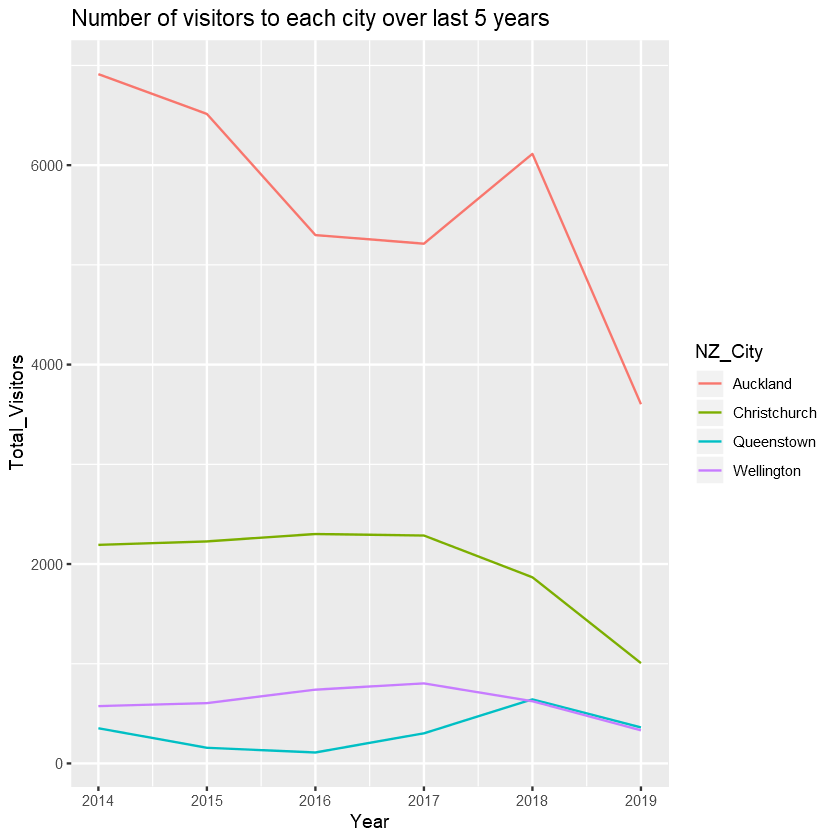

In [480]:
# A line chart that compares the trend of number of visitors to each city over the last 5 years.

vis_1 <- ggplot(vis1, aes(x = Year, y = Total_Visitors))
vis_1 + geom_line(aes(color = NZ_City)) + ggtitle("Number of visitors to each city over last 5 years")
ggsave("Number of visitors to each city over last 5 years.pdf")

In [481]:
#creating a dataframe for plotting bar chart
vis2 <- visitors_data %>% filter(Year == 2018) %>% filter(NZ_City == "Christchurch" | NZ_City == "Auckland" ) %>% 
        select(Year,NZ_City,Country,Number_of_People) %>% group_by(Year,NZ_City,Country) %>% 
        summarise(Total_Visitors = sum(Number_of_People)) %>% arrange(desc(Total_Visitors)) %>%
        top_n(5)

vis2

Selecting by Total_Visitors



Year NZ_City      Country                     Total_Visitors
1  2018 Auckland     China, People's Republic of 881           
2  2018 Auckland     Australia                   738           
3  2018 Auckland     Japan                       639           
4  2018 Auckland     United States of America    628           
5  2018 Christchurch Australia                   625           
6  2018 Auckland     England                     537           
7  2018 Christchurch England                     239           
8  2018 Christchurch Germany                     164           
9  2018 Christchurch China, People's Republic of 123           
10 2018 Christchurch Singapore                    92

Saving 6.67 x 6.67 in image



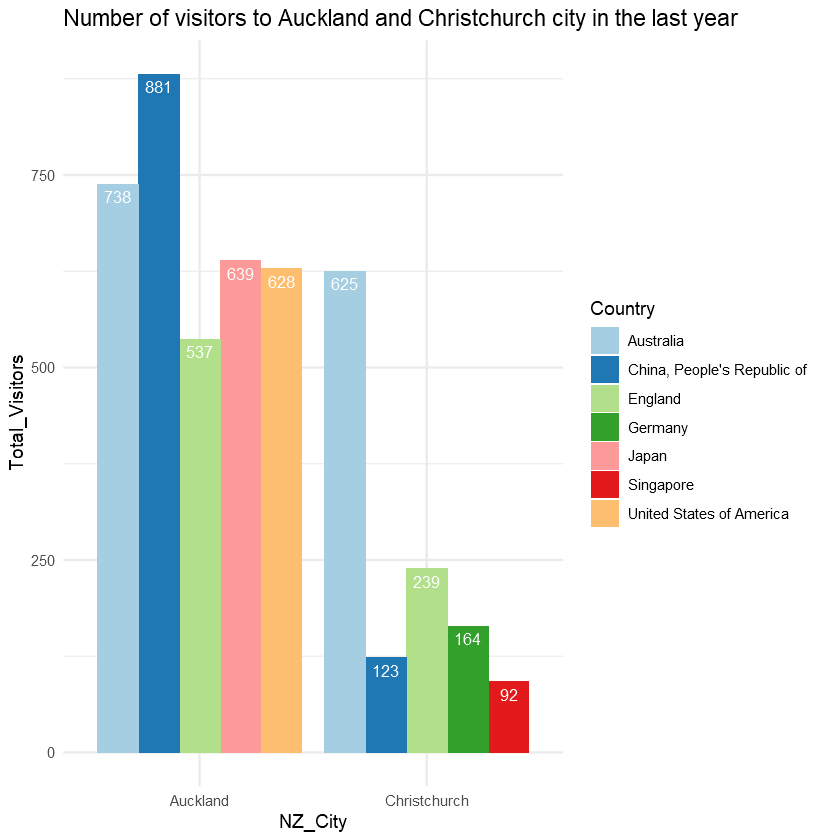

In [482]:
#A grouped bar chart that compares the number of visitors to Auckland and Christchurch city in the last year.

ggplot(data= vis2, aes(x=NZ_City, y= Total_Visitors, fill=Country)) +
  geom_bar(stat="identity", position=position_dodge())+
  geom_text(aes(label= Total_Visitors), vjust=1.6, color="white",
            position = position_dodge(0.9), size=3.5)+
  scale_fill_brewer(palette="Paired")+
  ggtitle("Number of visitors to Auckland and Christchurch city in the last year") +
  theme_minimal()
ggsave("Number of visitors to Auckland and Christchurch city in the last year.pdf")

In [483]:
#creating a dataframe for plotting pie chart
vis3 <- visitors_data %>% filter(Year == 2018) %>% filter(NZ_City == "Christchurch") %>% 
        select(Year,NZ_City,Visit_Purpose,Number_of_People) %>% group_by(Year,NZ_City,Visit_Purpose) %>% 
        summarise(Total_Visitors = sum(Number_of_People)) %>% arrange(desc(Total_Visitors)) %>%
        top_n(5)

vis3

Selecting by Total_Visitors



Year NZ_City      Visit_Purpose                Total_Visitors
1 2018 Christchurch Holiday / vacation           1390          
2 2018 Christchurch Visiting friends / relatives  351          
3 2018 Christchurch Business                       60          
4 2018 Christchurch Other                          29          
5 2018 Christchurch Education                      25

Saving 6.67 x 6.67 in image



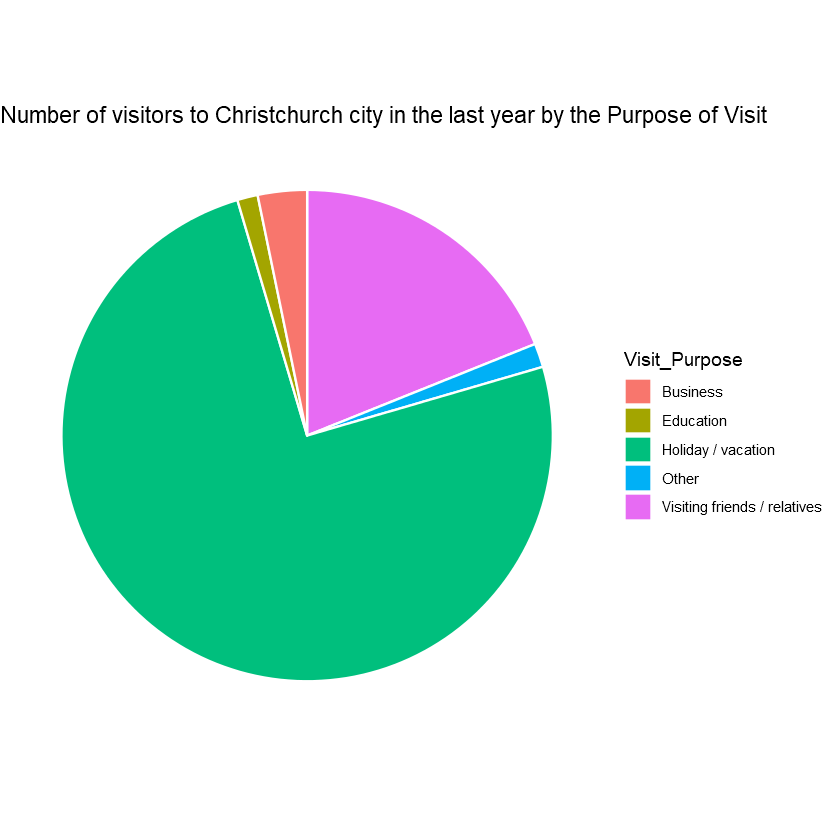

In [484]:
#A pie that compares the number of visitors to Christchurch city in the last year by the Purpose of Visit.

ggplot(vis3, aes(x = "", y = Total_Visitors , fill = Visit_Purpose)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  ggtitle("Number of visitors to Christchurch city in the last year by the Purpose of Visit") +
  theme_void()
ggsave("Number of visitors to Christchurch city in the last year by the Purpose of Visit.pdf")

In [485]:
#creating a dataframe for plotting pie chart
vis4 <- visitors_data %>% filter(Year == 2018) %>% filter(NZ_City == "Auckland") %>% 
        select(Year,NZ_City,Visit_Purpose,Number_of_People) %>% group_by(Year,NZ_City,Visit_Purpose) %>% 
        summarise(Total_Visitors = sum(Number_of_People)) %>% arrange(desc(Total_Visitors)) %>%
        top_n(5)

vis4

Selecting by Total_Visitors



Year NZ_City  Visit_Purpose                Total_Visitors
1 2018 Auckland Holiday / vacation           3950          
2 2018 Auckland Visiting friends / relatives 1340          
3 2018 Auckland Business                      347          
4 2018 Auckland Other                         203          
5 2018 Auckland Education                     138

Saving 6.67 x 6.67 in image



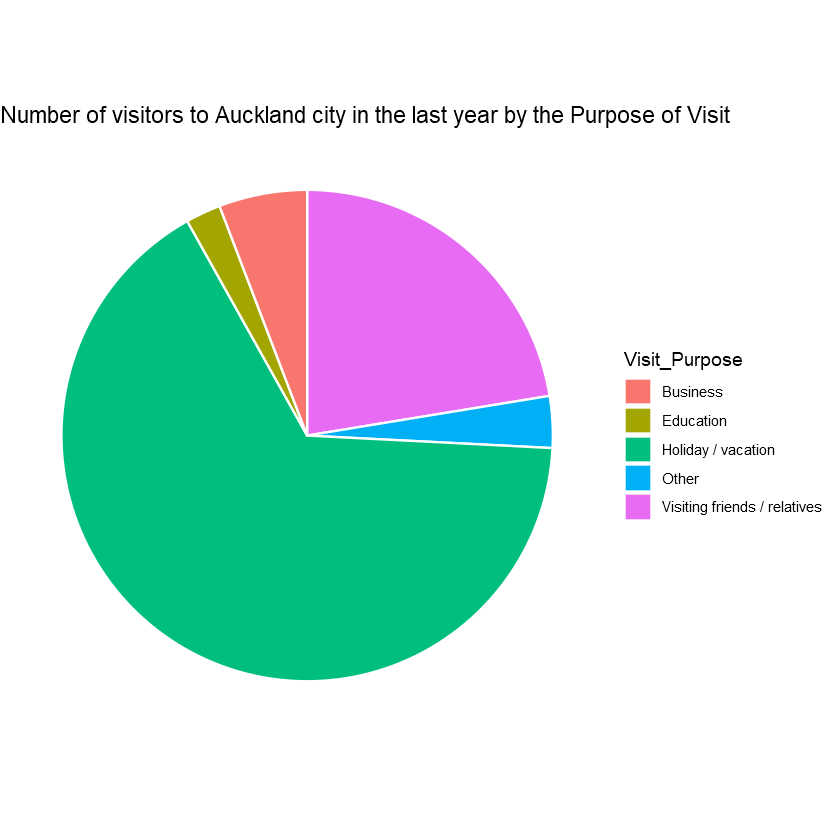

In [486]:
#A pie that compares the number of visitors to Auckland city in the last year by the Purpose of Visit.

ggplot(vis4, aes(x = "", y = Total_Visitors , fill = Visit_Purpose)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  ggtitle("Number of visitors to Auckland city in the last year by the Purpose of Visit") +
  theme_void()
ggsave("Number of visitors to Auckland city in the last year by the Purpose of Visit.pdf")

### Visualization based on Data Model



In [487]:
# Converted month into numeric format
visitor_df <- visitors_data
visitor_df$Month <- gsub("January","1", visitor_df$Month)
visitor_df$Month <- gsub("February","2", visitor_df$Month)
visitor_df$Month <- gsub("March","3", visitor_df$Month)
visitor_df$Month <- gsub("April","4", visitor_df$Month)
visitor_df$Month <- gsub("May","5", visitor_df$Month)
visitor_df$Month <- gsub("June","6", visitor_df$Month)
visitor_df$Month <- gsub("July","7", visitor_df$Month)
visitor_df$Month <- gsub("August","8", visitor_df$Month)
visitor_df$Month <- gsub("September","9", visitor_df$Month)
visitor_df$Month <- gsub("October","10", visitor_df$Month)
visitor_df$Month <- gsub("November","11", visitor_df$Month)
visitor_df$Month <- gsub("December","12", visitor_df$Month)
visitor_df %>% head

Year Month Quarter Country        NZ_City      Visit_Purpose          
1 2014 4     2014 1  Czech Republic Auckland     Other                  
2 2014 4     2014 1  England        Christchurch Holiday / vacation     
3 2014 4     2014 1  France         Auckland     Other                  
4 2014 4     2014 2  Australia      Auckland     Business               
5 2014 4     2014 2  Australia      Auckland     Conference / convention
6 2014 4     2014 2  Australia      Auckland     Education              
  Accommadation_Type                               Age   AvgDaysSpent
1 Backpackers                                      22.00 352.000     
2 Motel, Motor Inn or Serviced Apartment           67.00  22.000     
3 House / flat that you paid some rent for         27.00 357.000     
4 Motel, Motor Inn or Serviced Apartment           39.50   5.625     
5 Luxury Accommodation, 5-star Hotel, Luxury Lodge 30.75   4.500     
6 Staying with family or friends                   27.00   6.000     
  AvgSpending Number_of_People
1 22000.0000  1               
2  3662.9903  1               
3  5000.0000  1               
4  1122.4051  8               
5  1190.8391  4               
6   649.5486  1

In [488]:
# Inserted the "Q" to Quarter column values
for(i in 1:nrow(visitor_df))
{   
    visitor_df$Quarter[i] <- str_c(
                          str_sub(visitor_df$Quarter[i], start = 1L, end = -2L), 
                          "Q",
                          str_sub(visitor_df$Quarter[i], start = -1L, end = -1L)
                           )
}

In [489]:
# Removing the not specified from IVS-Month dataset
IVS_df <- visitor_df %>% filter(Year >= 2014) 
IVS_df <- IVS_df %>% filter(Month != "Not Specified") # %>% select(-c(3))
IVS_df %>% glimpse

Observations: 12,050
Variables: 11
$ Year               <dbl> 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, ...
$ Month              <chr> "4", "4", "4", "4", "4", "4", "4", "4", "4", "4"...
$ Quarter            <chr> "2014 Q1", "2014 Q1", "2014 Q1", "2014 Q2", "201...
$ Country            <chr> "Czech Republic", "England", "France", "Australi...
$ NZ_City            <chr> "Auckland", "Christchurch", "Auckland", "Aucklan...
$ Visit_Purpose      <chr> "Other", "Holiday / vacation", "Other", "Busines...
$ Accommadation_Type <chr> "Backpackers", "Motel, Motor Inn or Serviced Apa...
$ Age                <dbl> 22.00000, 67.00000, 27.00000, 39.50000, 30.75000...
$ AvgDaysSpent       <dbl> 352.000000, 22.000000, 357.000000, 5.625000, 4.5...
$ AvgSpending        <dbl> 22000.0000, 3662.9903, 5000.0000, 1122.4051, 119...
$ Number_of_People   <int> 1, 1, 1, 8, 4, 1, 28, 2, 34, 3, 42, 15, 1, 1, 17...


In [490]:
# Aggreated data of christchurch to find the number of people
vis1 <- IVS_df %>%
            filter(NZ_City == "Christchurch") %>%
            select(Year,NZ_City,Number_of_People) %>%
            group_by(Year,NZ_City) %>%
            summarise(Total_Visitors = sum(Number_of_People))
vis1

Year NZ_City      Total_Visitors
1 2014 Christchurch 2128          
2 2015 Christchurch 2145          
3 2016 Christchurch 2217          
4 2017 Christchurch 2206          
5 2018 Christchurch 1802          
6 2019 Christchurch  961

In [491]:
# Aggreated data of christchurch to find the crime count
crime_df <- read_csv("Crime.csv")
vis2 <- crime_df %>%
            filter(Year >= 2014) %>%
            filter(NZ_City == "Christchurch") %>%
            select(Year,NZ_City,CrimeCount) %>%
            group_by(Year,NZ_City) %>%
            summarise(Crimes = sum(CrimeCount))
vis2

Parsed with column specification:
cols(
  Year = col_double(),
  Month = col_double(),
  Quarter = col_character(),
  NZ_City = col_character(),
  PoliceStation = col_character(),
  CrimeCount = col_double()
)



Year NZ_City      Crimes
1 2014 Christchurch  669  
2 2015 Christchurch 1458  
3 2016 Christchurch 1414  
4 2017 Christchurch 1415  
5 2018 Christchurch 1656  
6 2019 Christchurch  926

In [492]:
# Merged two dataframe to visualize 
visual <- merge(vis1,vis2)
visual

Year NZ_City      Total_Visitors Crimes
1 2014 Christchurch 2128            669  
2 2015 Christchurch 2145           1458  
3 2016 Christchurch 2217           1414  
4 2017 Christchurch 2206           1415  
5 2018 Christchurch 1802           1656  
6 2019 Christchurch  961            926


Rendering [--------------------------------------------] at 4.7 fps ~ eta: 21s

Rendering [>-------------------------------------------] at 3.9 fps ~ eta: 25s

Rendering [>-------------------------------------------] at 3.5 fps ~ eta: 27s

Rendering [=>------------------------------------------] at 3.4 fps ~ eta: 28s

Rendering [=>------------------------------------------] at 3.7 fps ~ eta: 26s

Rendering [==>-----------------------------------------] at 3.8 fps ~ eta: 25s

Rendering [==>-----------------------------------------] at 3.9 fps ~ eta: 24s

Rendering [===>----------------------------------------] at 4.1 fps ~ eta: 23s

Rendering [===>----------------------------------------] at 4.1 fps ~ eta: 22s

Rendering [====>---------------------------------------] at 4.1 fps ~ eta: 22s

Rendering [====>---------------------------------------] at 4.2 fps ~ eta: 21s

Rendering [=====>--------------------------------------] at 4.2 fps ~ eta: 21s

Rendering [=====>----------------------

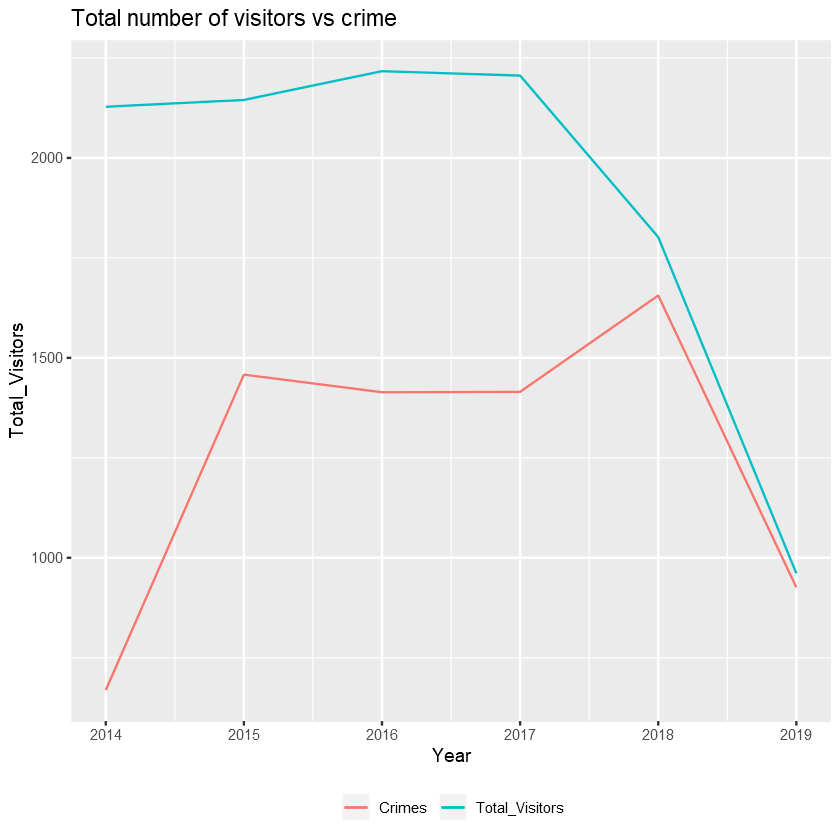

In [493]:
# Plotted total visitors and crime rate based on year

plot <- ggplot(visual, aes(x = Year)) + 
  geom_line(aes(y = Total_Visitors, colour = "Total_Visitors")) + 
  geom_line(aes(y = Crimes, colour = "Crimes")) +
  ggtitle("Total number of visitors vs crime") +
  theme(legend.position = "bottom")+
  labs(colour="")
plot + transition_reveal(Year)
plot

In [494]:
food_df <- read_csv("FoodPrice.csv")
rental_df <- read_csv("Rental.csv")

Parsed with column specification:
cols(
  Year = col_double(),
  Month = col_double(),
  Quarter = col_character(),
  Avg_Meal_Price = col_double()
)

Parsed with column specification:
cols(
  Year = col_double(),
  Month = col_double(),
  Quarter = col_character(),
  NZ_City = col_character(),
  Avg_rent = col_double()
)



In [495]:
# aggregated dataframe to find the average meal price
vis3 <- food_df %>%
            select(Year,Month,Quarter,Avg_Meal_Price) %>%
            group_by(Year,Month,Quarter) %>%
            summarise(Average_mealprice = mean(Avg_Meal_Price))
vis3 %>% glimpse

Observations: 244
Variables: 4
Groups: Year, Month [244]
$ Year              <dbl> 1999, 1999, 1999, 1999, 1999, 1999, 1999, 2000, 2...
$ Month             <dbl> 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9...
$ Quarter           <chr> "1999 Q2", "1999 Q3", "1999 Q3", "1999 Q3", "1999...
$ Average_mealprice <dbl> 616.3569, 617.1004, 617.1004, 619.3309, 620.0743,...


In [496]:
# aggregated dataframe to find the average rent price
vis4 <- rental_df %>%
            select(Year,Month,Quarter,Avg_rent) %>%
            group_by(Year,Month,Quarter) %>%
            summarise(Average_rentprice = mean(Avg_rent))
vis4 %>% glimpse

Observations: 321
Variables: 4
Groups: Year, Month [321]
$ Year              <dbl> 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1...
$ Month             <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4...
$ Quarter           <chr> "1993 Q1", "1993 Q1", "1993 Q1", "1993 Q2", "1993...
$ Average_rentprice <dbl> 128.5441, 129.0597, 127.9565, 126.2222, 129.9000,...


In [497]:
# merged the dataframe to visulaize
visual_2 <- merge(vis3,vis4)
visual_2 %>% head

Year Month Quarter Average_mealprice Average_rentprice
1 1999 10    1999 Q4 620.0743          155.0694         
2 1999 11    1999 Q4 620.0743          156.0986         
3 1999 12    1999 Q4 620.0743          155.7917         
4 1999  6    1999 Q2 616.3569          154.8750         
5 1999  7    1999 Q3 617.1004          155.6301         
6 1999  8    1999 Q3 617.1004          155.6528


Rendering [----------------------------------------------] at 2 fps ~ eta:  1m

Rendering [>-------------------------------------------] at 1.9 fps ~ eta:  1m

Rendering [=>------------------------------------------] at 1.8 fps ~ eta:  1m

Rendering [==>-----------------------------------------] at 1.8 fps ~ eta:  1m

Rendering [==>-------------------------------------------] at 2 fps ~ eta: 47s

Rendering [===>----------------------------------------] at 2.1 fps ~ eta: 44s

Rendering [===>----------------------------------------] at 2.2 fps ~ eta: 42s

Rendering [===>----------------------------------------] at 2.3 fps ~ eta: 40s

Rendering [====>---------------------------------------] at 2.3 fps ~ eta: 38s

Rendering [====>---------------------------------------] at 2.3 fps ~ eta: 39s

Rendering [=====>--------------------------------------] at 2.3 fps ~ eta: 38s

Rendering [=====>--------------------------------------] at 2.3 fps ~ eta: 37s

Rendering [======>---------------------

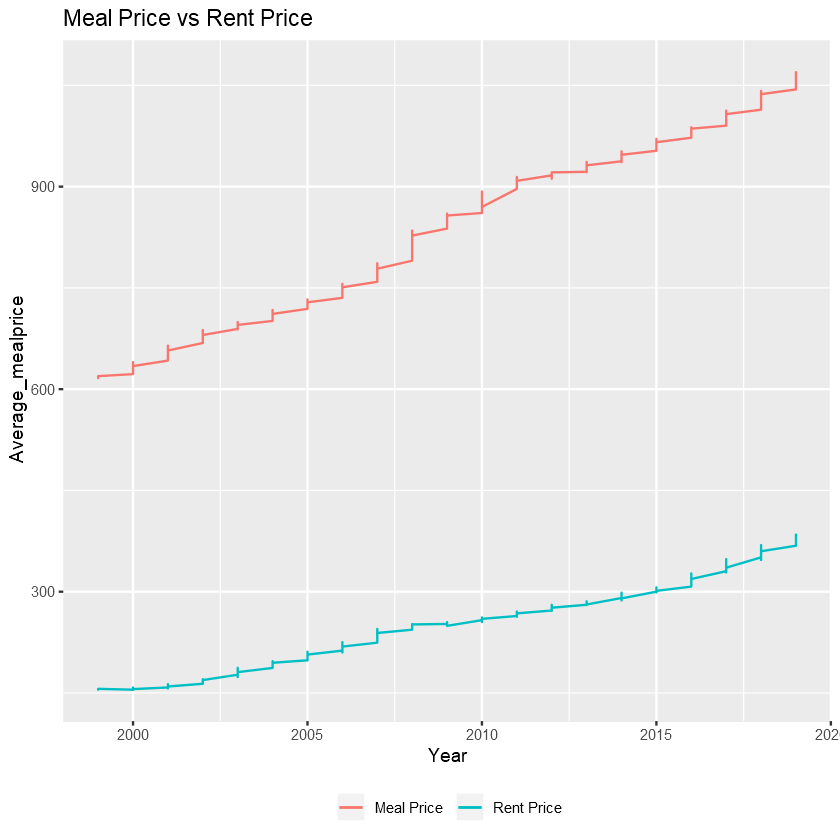

In [498]:
# plotted meal and rent price based on year

plot <- ggplot(visual_2, aes(x = Year)) + 
  geom_line(aes(y = Average_mealprice , colour = "Meal Price")) + 
  geom_line(aes(y = Average_rentprice, colour = "Rent Price")) +
  ggtitle("Meal Price vs Rent Price") +
  theme(legend.position = "bottom")+
  labs(colour="")
plot + transition_reveal(Year)
plot